<a href="https://colab.research.google.com/github/Sowmya-Dadheech/Meal_Scan/blob/main/MealScan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ML Mini Project

Importing required libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error as MSE


In [ ]:
df=pd.read_csv("/content/outbreaks.csv")

In [ ]:
#Finding the number of columns and rows
df.shape

(19119, 12)

In [ ]:
df.head()

,Year,Month,State,Location,Food,Ingredient,Species,Serotype/Genotype,Status,Illnesses,Hospitalizations,Fatalities
0,1998,January,California,Restaurant,NaN,NaN,NaN,NaN,NaN,20,0.0,0.0
1,1998,January,California,NaN,Custard,NaN,NaN,NaN,NaN,112,0.0,0.0
2,1998,January,California,Restaurant,NaN,NaN,NaN,NaN,NaN,35,0.0,0.0
3,1998,January,California,Restaurant,"Fish, Ahi",NaN,Scombroid toxin,NaN,Confirmed,4,0.0,0.0
4,1998,January,California,Private Home/Residence,"Lasagna, Unspecified; Eggs, Other",NaN,Salmonella enterica,Enteritidis,Confirmed,26,3.0,0.0


In [ ]:
df.describe()

,Year,Illnesses,Hospitalizations,Fatalities
count,19119.000000,19119.000000,15494.000000,15518.000000
mean,2005.562373,19.537162,0.947528,0.021717
std,5.158404,49.452417,5.312772,0.386976
min,1998.000000,2.000000,0.000000,0.000000
25%,2001.000000,3.000000,0.000000,0.000000
50%,2005.000000,8.000000,0.000000,0.000000
75%,2010.000000,19.000000,1.000000,0.000000
max,2015.000000,1939.000000,308.000000,33.000000


# **EXPLORATORY DATA ANALYSIS**

In [ ]:
#Calculating no. of null values
df.isnull().sum()

Year                     0
Month                    0
State                    0
Location              2166
Food                  8963
Ingredient           17243
Species               6619
Serotype/Genotype    15212
Status                6619
Illnesses                0
Hospitalizations      3625
Fatalities            3601
dtype: int64

There are 19119 rows in the dataset. The attributes 'Ingredient' and 'Serotype' have almost same amount of null values. Hence, we will ignore these attributes/columns.

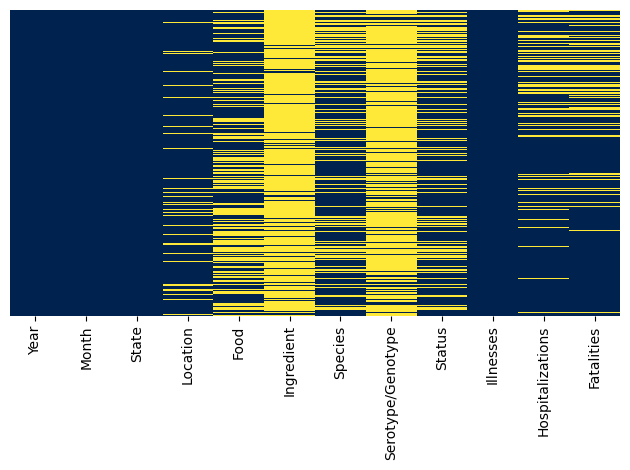

In [ ]:
plt.cla()
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='cividis')
plt.tight_layout()
display()

The above plot shows the distribution of null values. Blue represents no null values. Yellow represents null values.

In [ ]:
df =df.rename(index=str, columns={"Serotype/Genotype": "Serotype"})

The following is graph plotting the distribution of values under 'Species'.

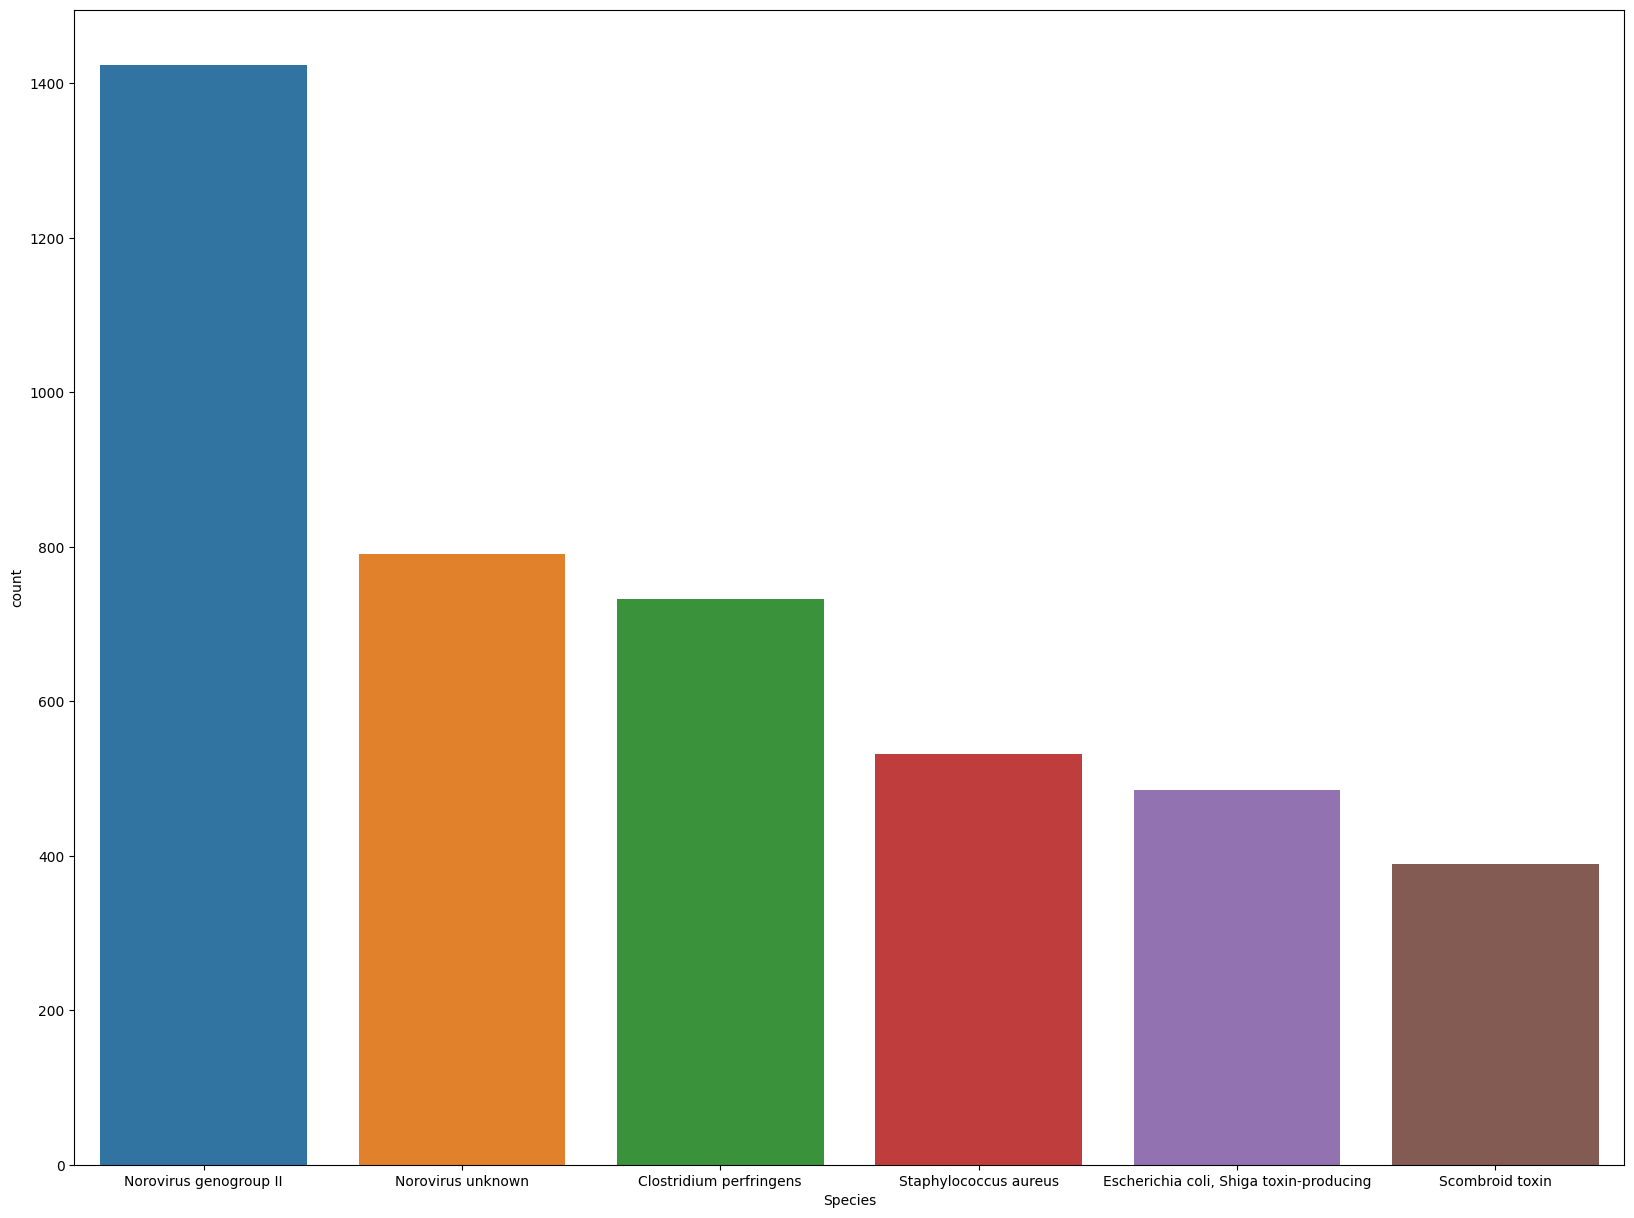

In [ ]:
plt.subplots(figsize=(20,15))
sns.countplot(x='Species', data=df, order= df.Species.value_counts().iloc[2:8].index)
display()

Plotting the distribution of the illnesses throughout all the states in the U.S.A

In [ ]:
df2 = pd.pivot_table(df, index='State', values='Illnesses', aggfunc='count')
df2.head()

,Illnesses
State,
Alabama,241
Alaska,86
Arizona,311
Arkansas,54
California,2293


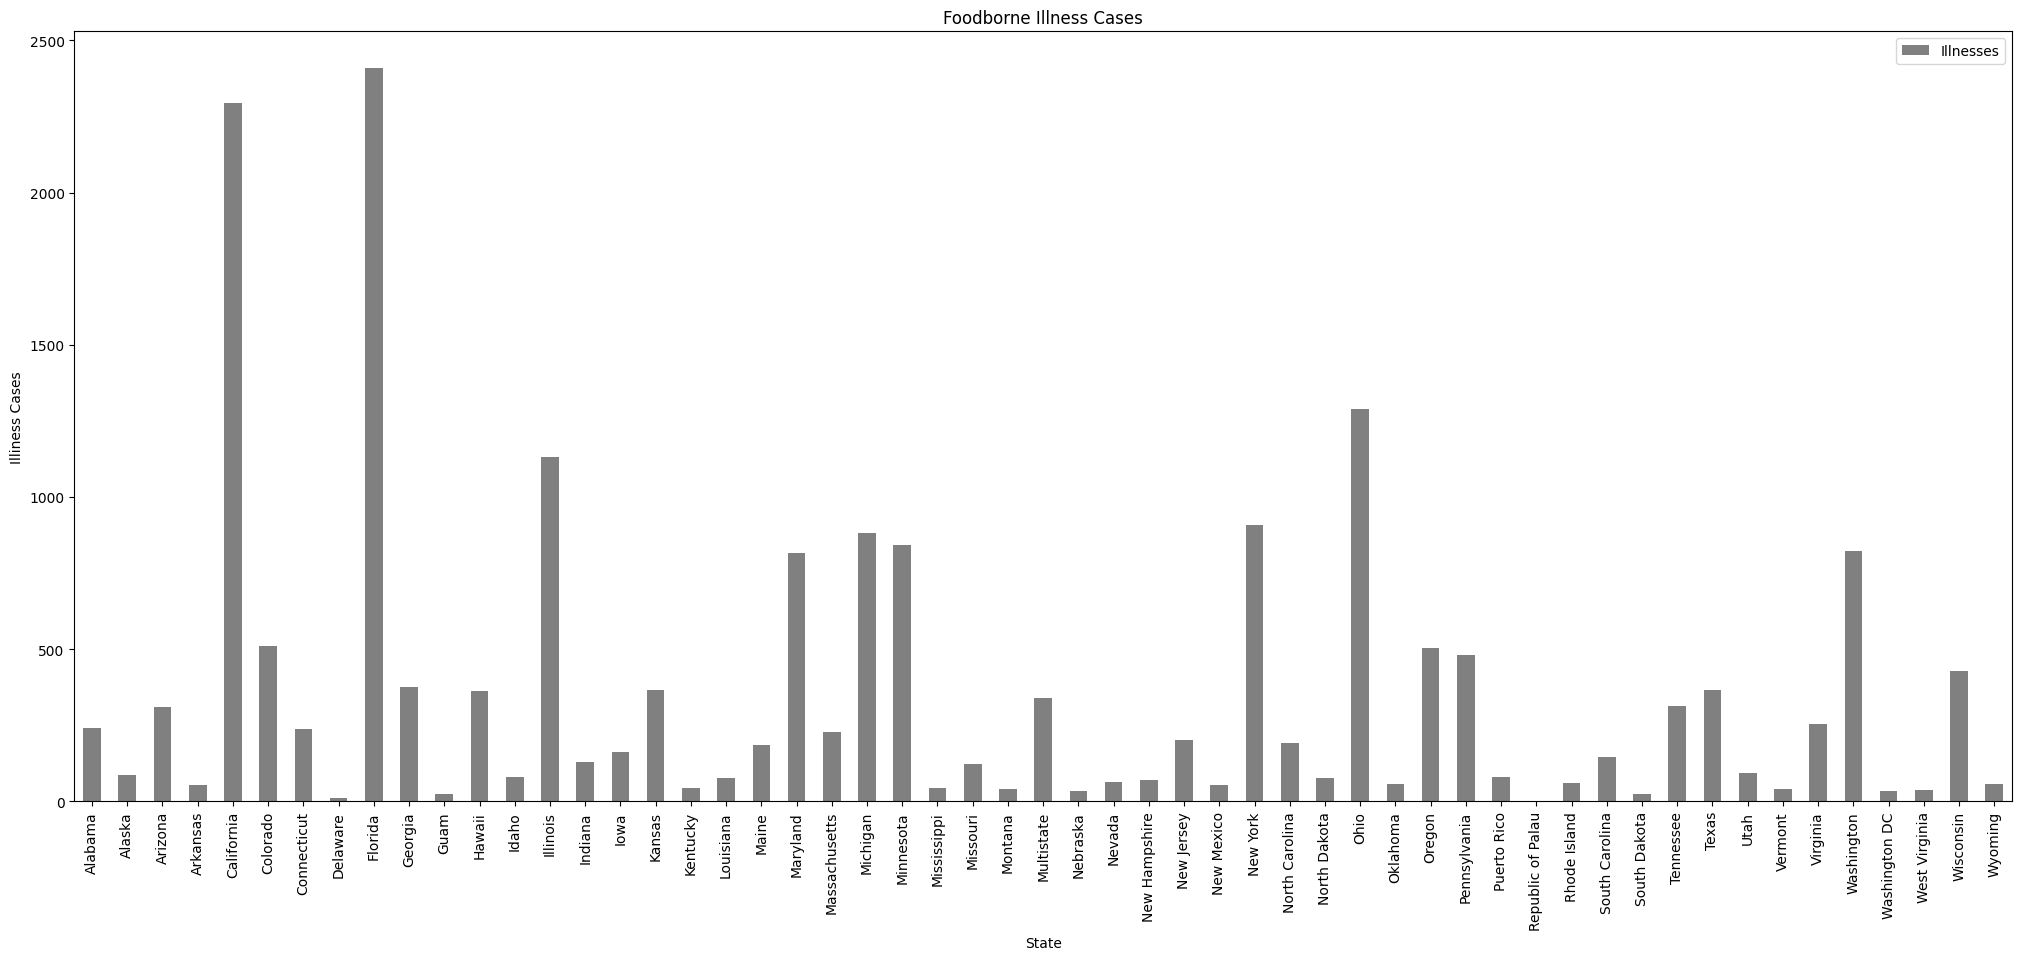

In [ ]:
ax = df2.plot(kind='bar', color='grey',figsize=(25,10))
plt.title('Foodborne Illness Cases')
plt.ylabel('Illiness Cases')
display()

In [ ]:
df.Food.value_counts()

Multiple Foods                                        206
Oysters, Raw                                          165
Ground Beef, Hamburger                                127
Salad, Unspecified                                    118
Chicken, Unspecified                                  105
                                                     ... 
Goat, Other                                             1
Chicken, Nuggets/Fingers; Coleslaw; Potato, Mashed      1
Sandwich, Club; Potato Salad                            1
Milk, 2% Milk Pasteurized                               1
Cookies, Chocolate Chip                                 1
Name: Food, Length: 3127, dtype: int64

Dropping columns we don't need

In [ ]:
df.drop(['Ingredient', 'Serotype', 'Species', 'Status', 'Fatalities'], axis=1, inplace=True)
df.head()

,Year,Month,State,Location,Food,Illnesses,Hospitalizations
0,1998,January,California,Restaurant,NaN,20,0.0
1,1998,January,California,NaN,Custard,112,0.0
2,1998,January,California,Restaurant,NaN,35,0.0
3,1998,January,California,Restaurant,"Fish, Ahi",4,0.0
4,1998,January,California,Private Home/Residence,"Lasagna, Unspecified; Eggs, Other",26,3.0


Checking the dataset again for number of null values.

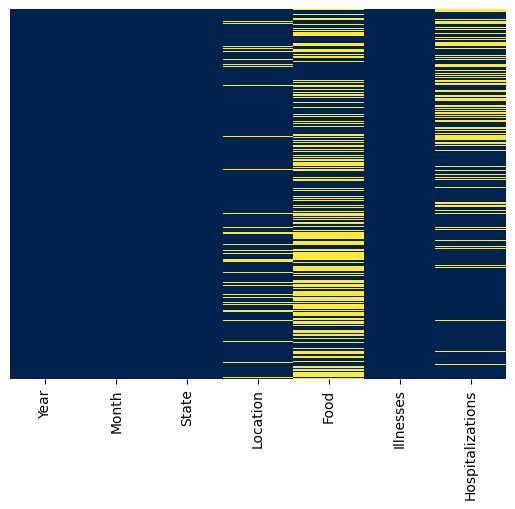

In [ ]:
plt.cla()
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='cividis')
display()

In [ ]:
df.isnull().sum()

Year                   0
Month                  0
State                  0
Location            2166
Food                8963
Illnesses              0
Hospitalizations    3625
dtype: int64

In [ ]:
df.count()

Year                19119
Month               19119
State               19119
Location            16953
Food                10156
Illnesses           19119
Hospitalizations    15494
dtype: int64

**Plotting how Illnesses are distributed over the dataset**

<ipython-input-17-2f6788d5952b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Illnesses, bins=10, color='steelblue')


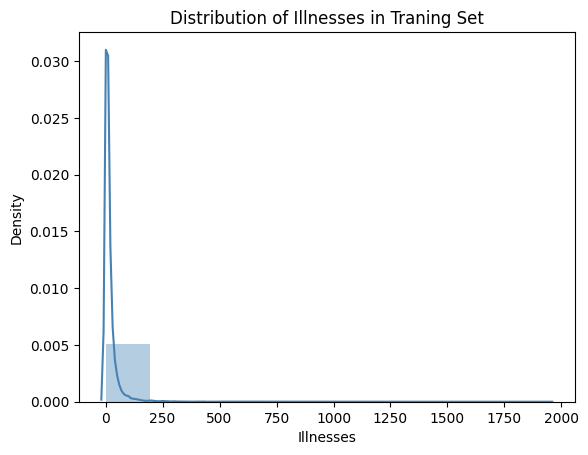

In [ ]:
plt.cla()
sns.distplot(df.Illnesses, bins=10, color='steelblue')
plt.title('Distribution of Illnesses in Traning Set')
display()

Sum of number of cases in each state.

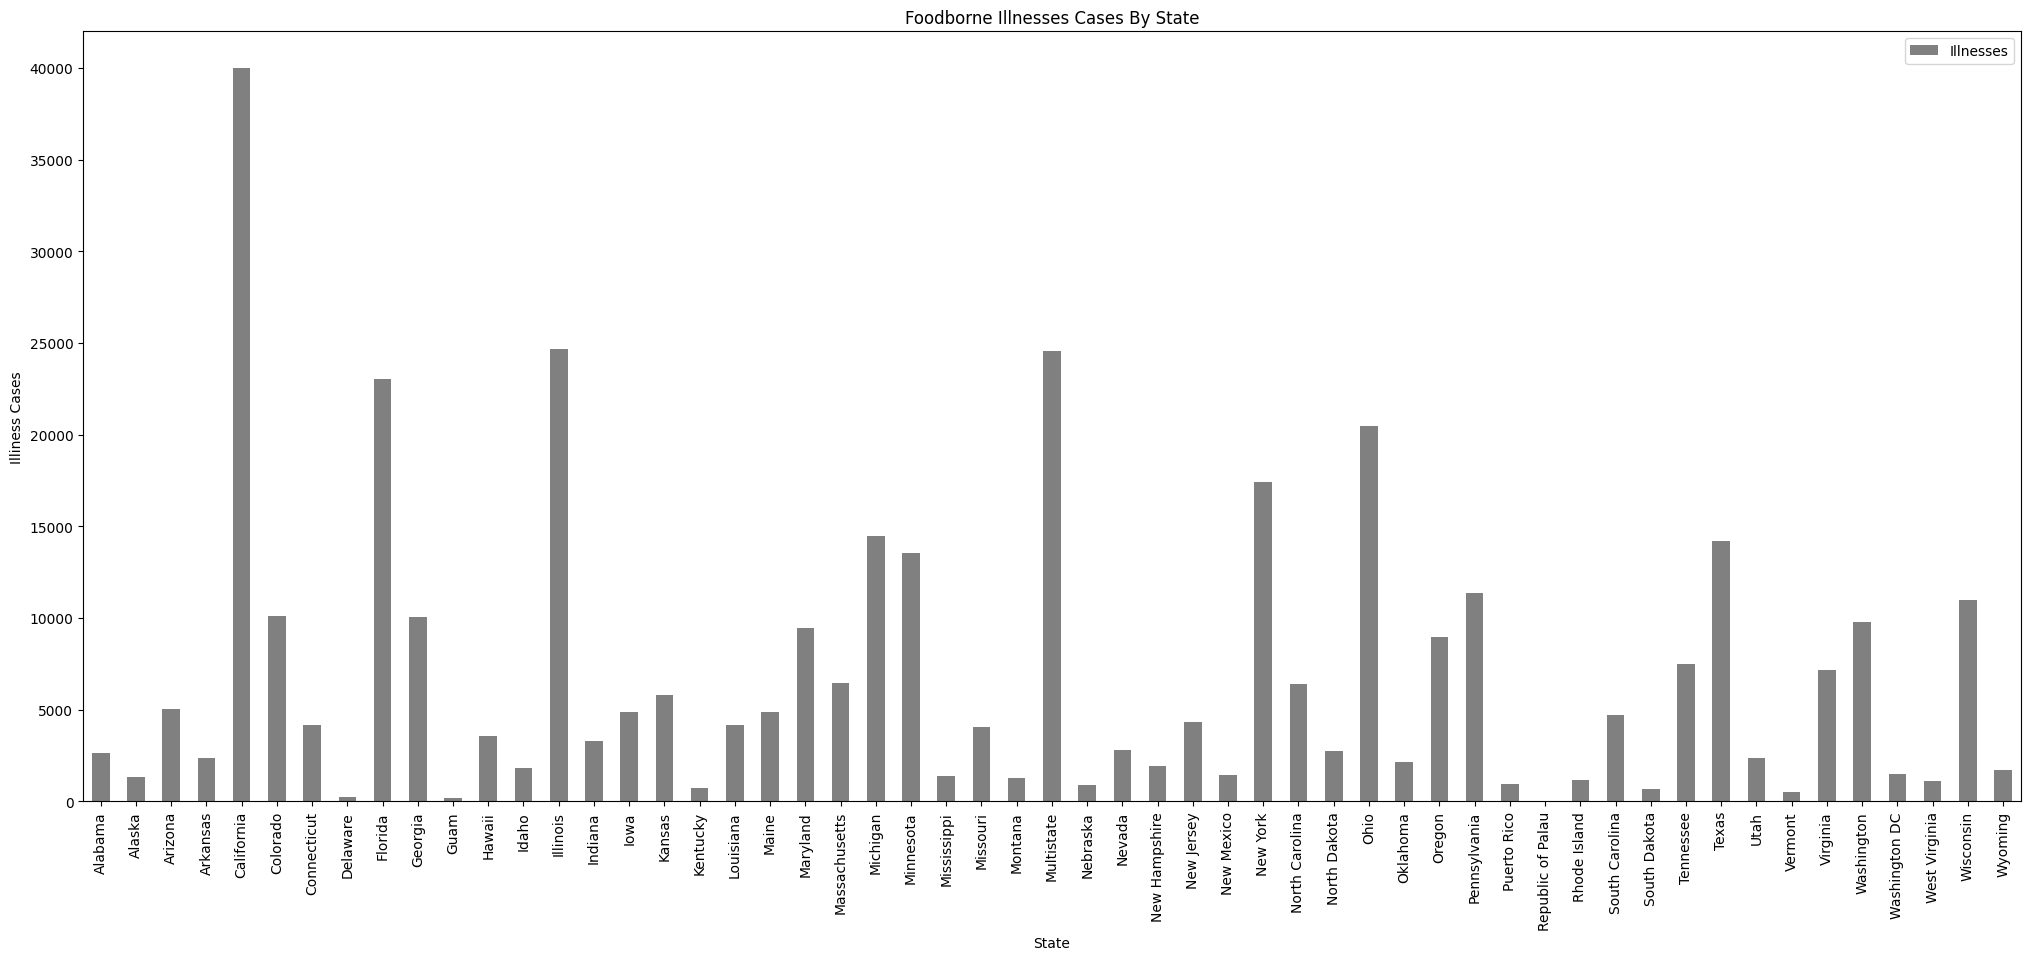

In [ ]:
# plt.cla()
df2 = pd.pivot_table(df, index='State', values='Illnesses', aggfunc='sum')
ax = df2.plot(kind='bar', color='grey',figsize=(25,10))
plt.title('Foodborne Illnesses Cases By State')
plt.ylabel('Illiness Cases')
plt.show()

Total number of cases in each year

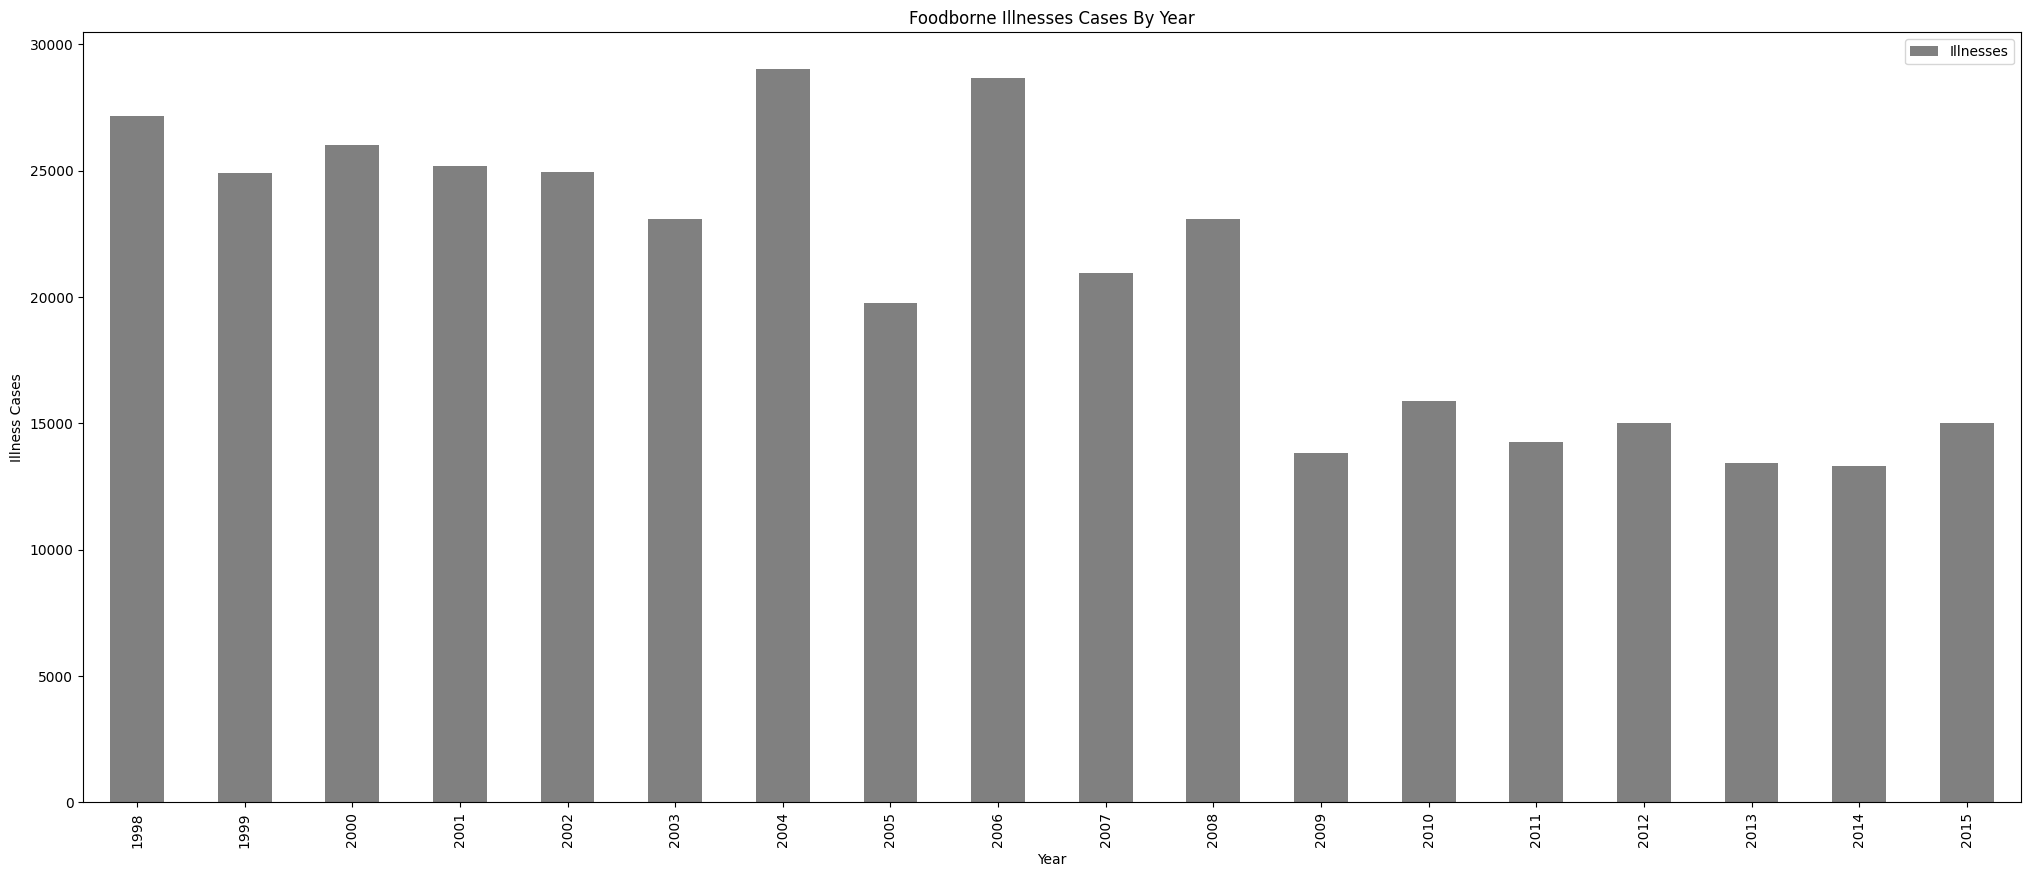

In [ ]:
df2 = pd.pivot_table(df, index='Year', values='Illnesses', aggfunc='sum')
ax = df2.plot(kind='bar', color='grey',figsize=(25,10))
plt.title('Foodborne Illnesses Cases By Year')
plt.ylabel('Illness Cases')
display()

Number of cases in every month

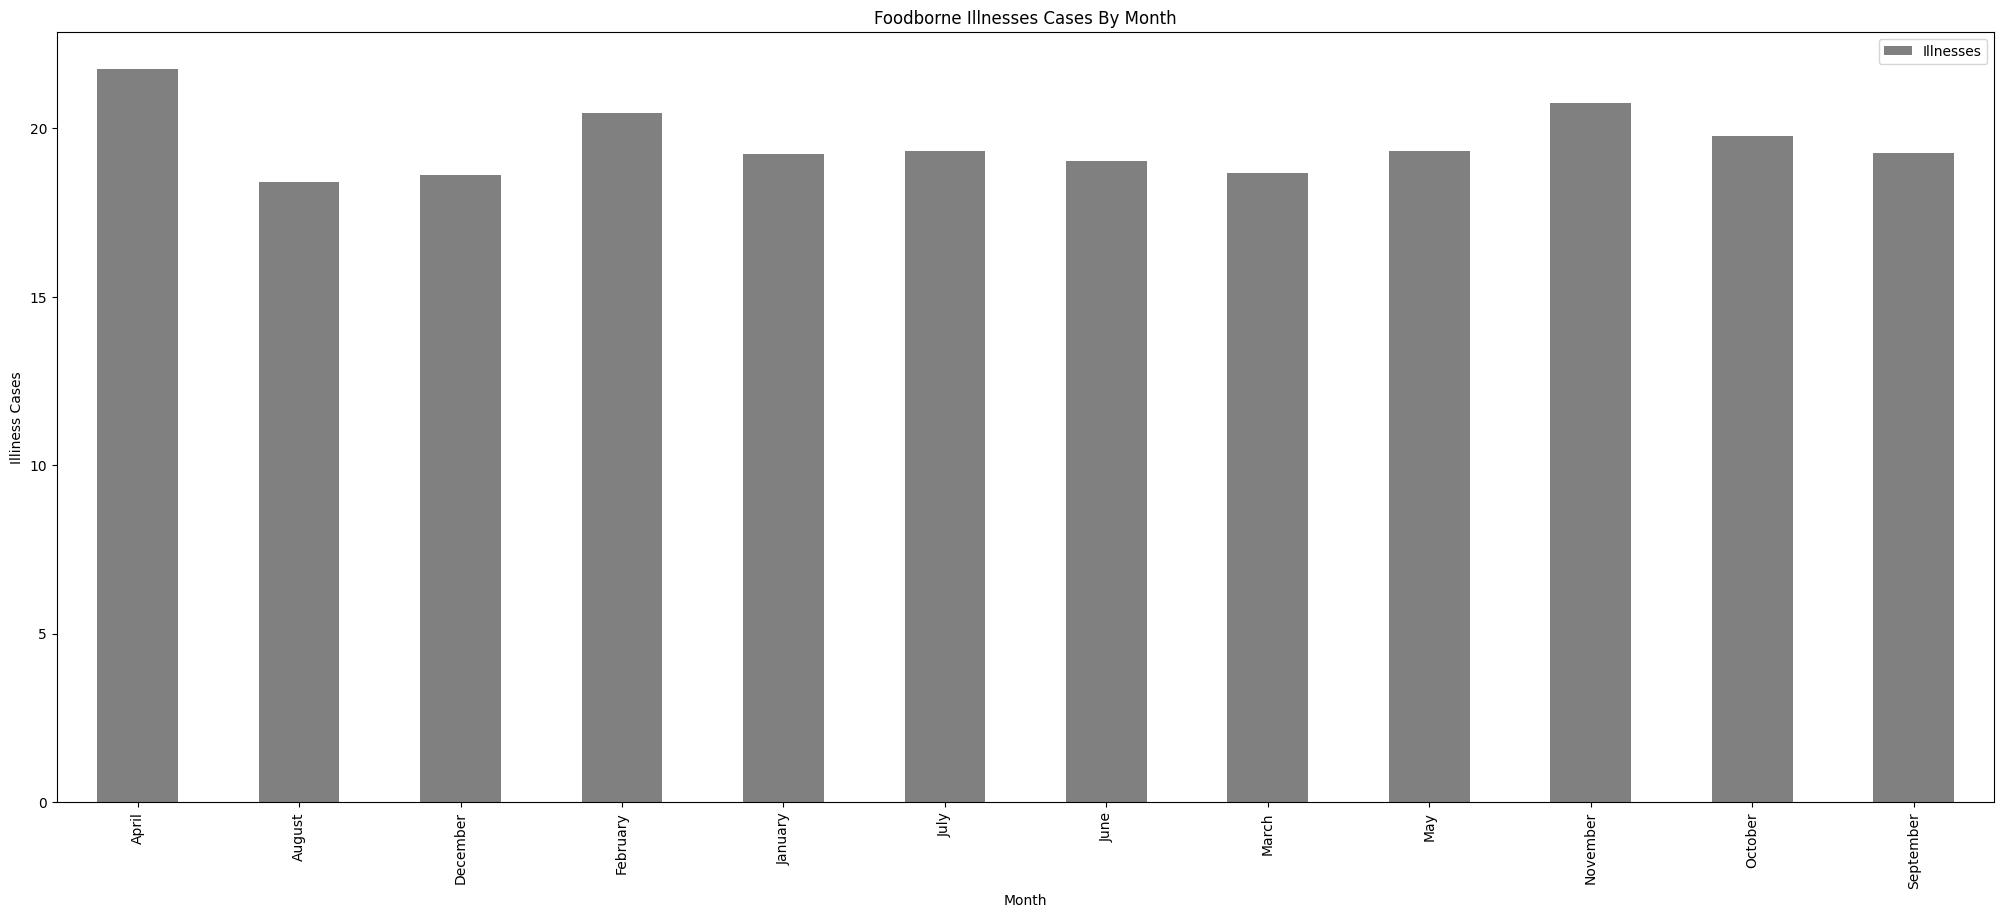

In [ ]:
df2 = pd.pivot_table(df, index='Month', values='Illnesses', aggfunc='mean')
ax = df2.plot(kind='bar', color='grey',figsize=(25,10))
plt.title('Foodborne Illnesses Cases By Month')
plt.ylabel('Illiness Cases')
display()

Filling missing values in the dataset

In [ ]:
df.Food.value_counts()

Multiple Foods                                        206
Oysters, Raw                                          165
Ground Beef, Hamburger                                127
Salad, Unspecified                                    118
Chicken, Unspecified                                  105
                                                     ... 
Goat, Other                                             1
Chicken, Nuggets/Fingers; Coleslaw; Potato, Mashed      1
Sandwich, Club; Potato Salad                            1
Milk, 2% Milk Pasteurized                               1
Cookies, Chocolate Chip                                 1
Name: Food, Length: 3127, dtype: int64

In [ ]:
df.Location.value_counts()

Restaurant                                                               10448
Private Home/Residence                                                    1681
Catering Service                                                          1089
Banquet Facility                                                           367
Fast Food Restaurant                                                       366
                                                                         ...  
Private Home/Residence; Grocery Store; Child Daycare                         1
Restaurant; Private Home/Residence; Catering Service; Fair/Festival          1
Restaurant; Private Home/Residence; Grocery Store; Religious Facility        1
Child Daycare; Religious Facility                                            1
Hotel/Motel                                                                  1
Name: Location, Length: 161, dtype: int64

In [ ]:
df.Food.fillna("Unspecified", inplace=True)
df.Location.fillna("Unknown", inplace=True)

In [ ]:
df.Hospitalizations.fillna(0, inplace=True)

In [ ]:
df['normalized_hospitalizations'] = df.apply(lambda row: round((row.Hospitalizations/row.Illnesses)*100), axis=1)

<ipython-input-26-99b4df3b98dd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.normalized_hospitalizations, bins=10, color='steelblue')


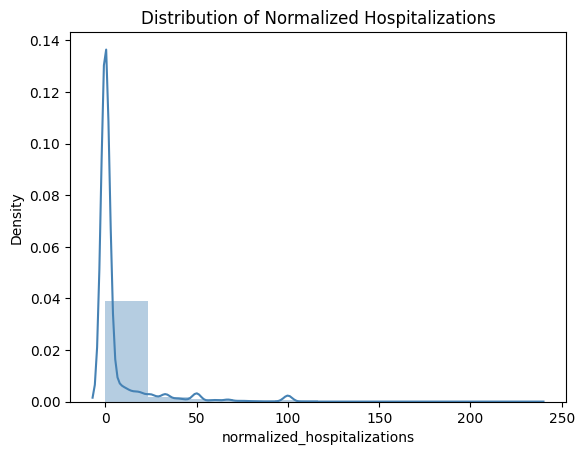

In [ ]:
sns.distplot(df.normalized_hospitalizations, bins=10, color='steelblue')
plt.title('Distribution of Normalized Hospitalizations')
display()

<ipython-input-27-2af11ed7ad75>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log10(df.Illnesses), bins=10, color='steelblue')


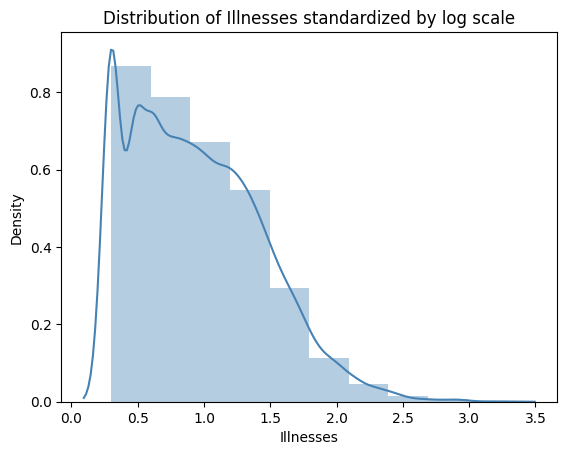

In [ ]:
sns.distplot(np.log10(df.Illnesses), bins=10, color='steelblue')
plt.title('Distribution of Illnesses standardized by log scale')
display()

In [ ]:
df['Illnesses_log'] = np.log(df.Illnesses)
df.head()

,Year,Month,State,Location,Food,Illnesses,Hospitalizations,normalized_hospitalizations,Illnesses_log
0,1998,January,California,Restaurant,Unspecified,20,0.0,0,2.995732
1,1998,January,California,Unknown,Custard,112,0.0,0,4.718499
2,1998,January,California,Restaurant,Unspecified,35,0.0,0,3.555348
3,1998,January,California,Restaurant,"Fish, Ahi",4,0.0,0,1.386294
4,1998,January,California,Private Home/Residence,"Lasagna, Unspecified; Eggs, Other",26,3.0,12,3.258097


**TASK 3 : MODEL B

In [ ]:
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model, metrics

In [ ]:
X = df[['Year']]

y=df[['Illnesses_log']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state=50)

In [ ]:

reg = linear_model.LinearRegression()

reg.fit(X_train, y_train)

print('Coefficients: ', reg.coef_)

print('Variance score: {}'.format(reg.score(X_test, y_test)))

Coefficients:  [[0.00363455]]
Variance score: 0.00016396486228664742


In [ ]:
from sklearn.metrics import mean_squared_error

y_pred = reg.predict(X_test)

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.9452381059198678
Mean Squared Error: 1.297165285970243
Root Mean Squared Error: 1.1389316423606128


In [ ]:
import xgboost as xg
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)

xgb_r.fit(X_train, y_train)

pred = xgb_r.predict(X_test)

mse = metrics.mean_squared_error(y_test, pred)
mae = metrics.mean_absolute_error(y_test, pred)

rmse = np.sqrt(MSE(y_test, pred))
print("MAE : %f" %(mae))
print("MSE : %f" %(mse))
print("RMSE : % f" %(rmse))

[16:51:59] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
MAE : 0.938361
MSE : 1.293818
RMSE :  1.137461


In [ ]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

df['State']= label_encoder.fit_transform(df['State'])

df['Month']= label_encoder.fit_transform(df['Month'])

In [ ]:
X = df[['State','Month']]

y=df[['Illnesses_log']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state=50)

In [ ]:

reg1 = linear_model.LinearRegression()

reg1.fit(X_train, y_train)

print('Coefficients: ', reg1.coef_)

print('Variance score: {}'.format(reg1.score(X_test, y_test)))

Coefficients:  [[ 0.00998399 -0.00148221]]
Variance score: 0.013609548817217543


In [ ]:
from sklearn.metrics import mean_squared_error

y_pred = reg1.predict(X_test)

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.9343626180758462
Mean Squared Error: 1.279721281010437
Root Mean Squared Error: 1.1312476656375636


In [ ]:
import xgboost as xg

In [ ]:
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)

xgb_r.fit(X_train, y_train)

pred = xgb_r.predict(X_test)

mse = metrics.mean_squared_error(y_test, pred)
mae = metrics.mean_absolute_error(y_test, pred)

rmse = np.sqrt(MSE(y_test, pred))
print("MAE : %f" %(mae))
print("MSE : %f" %(mse))
print("RMSE : % f" %(rmse))

[16:48:57] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
MAE : 0.846383
MSE : 1.113320
RMSE :  1.055140


In [ ]:
df_new= df.copy()
df_new.head(5)

,Year,Month,State,Location,Food,Illnesses,Hospitalizations,normalized_hospitalizations,Illnesses_log
0,1998,4,4,Restaurant,Unspecified,20,0.0,0,2.995732
1,1998,4,4,Unknown,Custard,112,0.0,0,4.718499
2,1998,4,4,Restaurant,Unspecified,35,0.0,0,3.555348
3,1998,4,4,Restaurant,"Fish, Ahi",4,0.0,0,1.386294
4,1998,4,4,Private Home/Residence,"Lasagna, Unspecified; Eggs, Other",26,3.0,12,3.258097


In [ ]:
df_new.drop(['Hospitalizations'], axis=1, inplace=True)
df_new.head(1)

,Year,Month,State,Location,Food,Illnesses,normalized_hospitalizations,Illnesses_log
0,1998,4,4,Restaurant,Unspecified,20,0,2.995732


In [ ]:
df_new.Location.value_counts()

Restaurant                                                               10448
Unknown                                                                   2521
Private Home/Residence                                                    1681
Catering Service                                                          1089
Banquet Facility                                                           367
                                                                         ...  
Private Home/Residence; Grocery Store; Child Daycare                         1
Restaurant; Private Home/Residence; Catering Service; Fair/Festival          1
Restaurant; Private Home/Residence; Grocery Store; Religious Facility        1
Child Daycare; Religious Facility                                            1
Hotel/Motel                                                                  1
Name: Location, Length: 161, dtype: int64

In [ ]:
df_new.Food.value_counts()

Unspecified                                           8963
Multiple Foods                                         206
Oysters, Raw                                           165
Ground Beef, Hamburger                                 127
Salad, Unspecified                                     118
                                                      ... 
Goat, Other                                              1
Chicken, Nuggets/Fingers; Coleslaw; Potato, Mashed       1
Sandwich, Club; Potato Salad                             1
Milk, 2% Milk Pasteurized                                1
Cookies, Chocolate Chip                                  1
Name: Food, Length: 3128, dtype: int64

In [ ]:

df_new['Location_modified']=df_new['Location'].str.split(';').str[0]
df_new['Food_modified']=df_new['Food'].str.split(',').str[0]
df_new['Food_modified_new']=df_new['Food_modified'].str.split(';').str[0]

In [ ]:
df_new.Food_modified_new.value_counts()

Unspecified                   8963
Chicken                        713
Sandwich                       551
Fish                           531
Ground Beef                    382
                              ... 
Black Bean And Beef Nachos       1
Raw Cookie Dough                 1
Chicken Fu Yung                  1
Chicken And Broccoli             1
Foie Gras                        1
Name: Food_modified_new, Length: 949, dtype: int64

In [ ]:
list(df_new.columns)

['Year',
 'Month',
 'State',
 'Location',
 'Food',
 'Illnesses',
 'normalized_hospitalizations',
 'Illnesses_log',
 'Location_modified',
 'Food_modified',
 'Food_modified_new']

In [ ]:
df_new.head()

,Year,Month,State,Location,Food,Illnesses,normalized_hospitalizations,Illnesses_log,Location_modified,Food_modified,Food_modified_new
0,1998,4,4,Restaurant,Unspecified,20,0,2.995732,Restaurant,Unspecified,Unspecified
1,1998,4,4,Unknown,Custard,112,0,4.718499,Unknown,Custard,Custard
2,1998,4,4,Restaurant,Unspecified,35,0,3.555348,Restaurant,Unspecified,Unspecified
3,1998,4,4,Restaurant,"Fish, Ahi",4,0,1.386294,Restaurant,Fish,Fish
4,1998,4,4,Private Home/Residence,"Lasagna, Unspecified; Eggs, Other",26,12,3.258097,Private Home/Residence,Lasagna,Lasagna


In [ ]:

label_encoder = preprocessing.LabelEncoder()

df_new['Location_modified']= label_encoder.fit_transform(df_new['Location_modified'])
df_new['Food_Modified_new']= label_encoder.fit_transform(df_new['Food_modified_new'])

In [ ]:
df_new.head()

,Year,Month,State,Location,Food,Illnesses,normalized_hospitalizations,Illnesses_log,Location_modified,Food_modified,Food_modified_new,Food_Modified_new
0,1998,4,4,Restaurant,Unspecified,20,0,2.995732,16,Unspecified,Unspecified,903
1,1998,4,4,Unknown,Custard,112,0,4.718499,20,Custard,Custard,283
2,1998,4,4,Restaurant,Unspecified,35,0,3.555348,16,Unspecified,Unspecified,903
3,1998,4,4,Restaurant,"Fish, Ahi",4,0,1.386294,16,Fish,Fish,336
4,1998,4,4,Private Home/Residence,"Lasagna, Unspecified; Eggs, Other",26,12,3.258097,14,Lasagna,Lasagna,471


<ipython-input-97-b1c0cfc7525b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_new.corr(),annot=True)


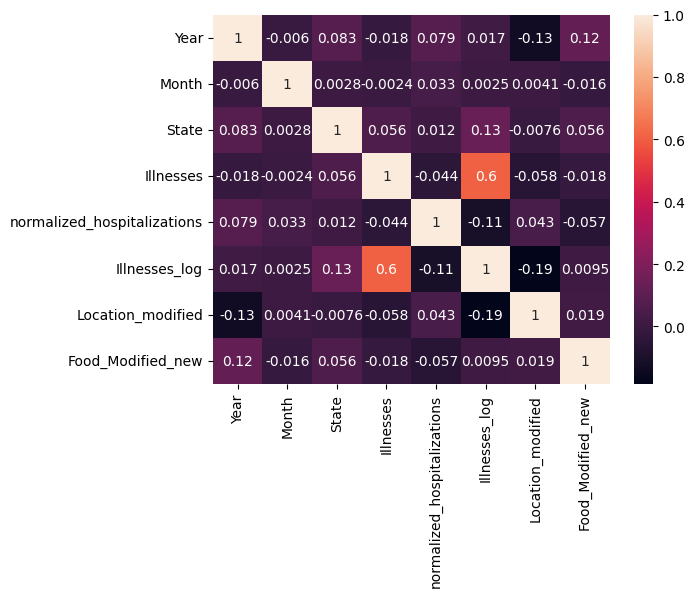

In [ ]:
sns.heatmap(df_new.corr(),annot=True)
display()


In [ ]:
X =df_new[['Location_modified','Food_Modified_new','State','Month']]
y=df_new[['Illnesses_log']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state=50)

In [ ]:
reg2 = linear_model.LinearRegression()

reg2.fit(X_train, y_train)

print('Coefficients: ', reg2.coef_)

print('Variance score: {}'.format(reg2.score(X_test, y_test)))

Coefficients:  [[-4.08413559e-02  1.10814016e-05  9.97396046e-03 -1.39315947e-03]]
Variance score: 0.057488095288167895


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.svm import LinearSVR
y_pred = reg2.predict(X_test)

In [ ]:

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.904453603050419
Mean Squared Error: 1.2227942196917188
Root Mean Squared Error: 1.105800262114148


In [ ]:
import xgboost as xg
from sklearn.metrics import mean_squared_error as MSE

In [ ]:
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)

xgb_r.fit(X_train, y_train)

pred = xgb_r.predict(X_test)

mse = MSE(y_test, pred)
mae = metrics.mean_absolute_error(y_test, pred)
rmse = np.sqrt(MSE(y_test, pred))
print("MSE : %f" %(mse))
print("MAE : %f" %(mae))
print("RMSE : % f" %(rmse))

[16:49:12] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
MSE : 0.934377
MAE : 0.762370
RMSE :  0.966632
